In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load
library(tidyverse) # metapackage of all tidyverse packages
library(ggplot2)
library(dplyr)
library(Amelia)
# Input data files are available in the read-only "../input/" directory
# Reading Hospital cost dataset.
data <- read.csv('../input/healthcare-cost/HospitalCosts.csv')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [2]:
head(data)

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
,<int>,<int>,<int>,<int>,<int>,<int>
1,17,1,2,1,2660,560
2,17,0,2,1,1689,753
3,17,1,7,1,20060,930
4,17,1,1,1,736,758
5,17,1,1,1,1194,754
6,17,0,0,1,3305,347


In [3]:
str(data)

'data.frame':	500 obs. of  6 variables:
 $ AGE   : int  17 17 17 17 17 17 17 16 16 17 ...
 $ FEMALE: int  1 0 1 1 1 0 1 1 1 1 ...
 $ LOS   : int  2 2 7 1 1 0 4 2 1 2 ...
 $ RACE  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ TOTCHG: int  2660 1689 20060 736 1194 3305 2205 1167 532 1363 ...
 $ APRDRG: int  560 753 930 758 754 347 754 754 753 758 ...


In [4]:
data <- data %>%
    rename(SEX = FEMALE, COST = TOTCHG, DIAG = APRDRG)

head(data)

,AGE,SEX,LOS,RACE,COST,DIAG
,<int>,<int>,<int>,<int>,<int>,<int>
1,17,1,2,1,2660,560
2,17,0,2,1,1689,753
3,17,1,7,1,20060,930
4,17,1,1,1,736,758
5,17,1,1,1,1194,754
6,17,0,0,1,3305,347


In [5]:
data$SEX <- as.factor(data$SEX)
levels(data$SEX) <- c('M', 'F')
data$RACE <- as.factor(data$RACE)


**Checking and fixing NA values**

In [6]:
any(is.na(data))

[1] TRUE

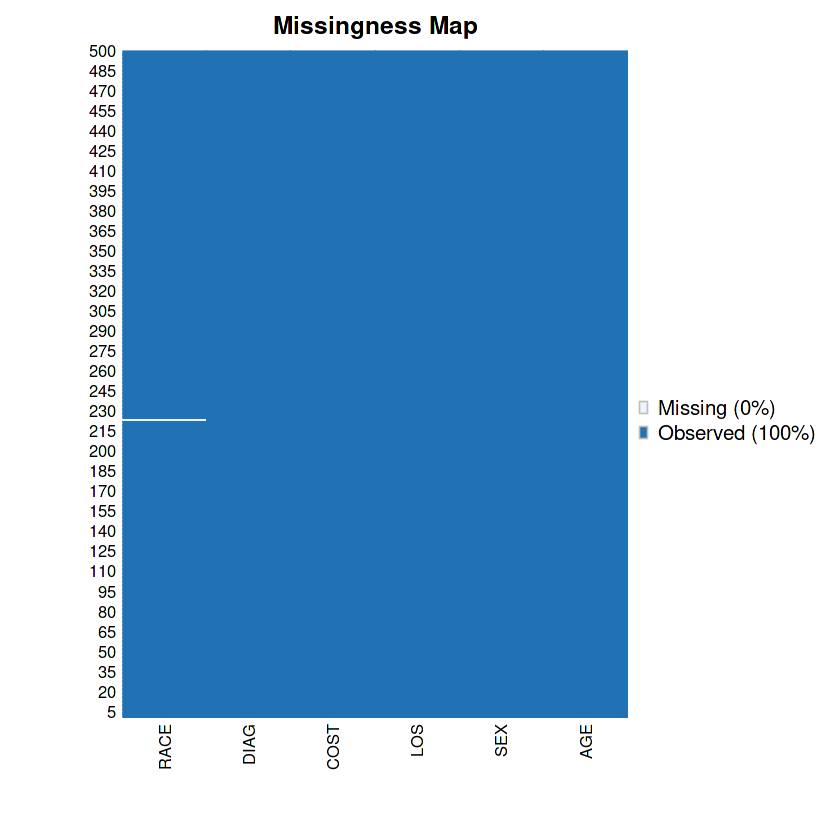

In [7]:
missmap(data)

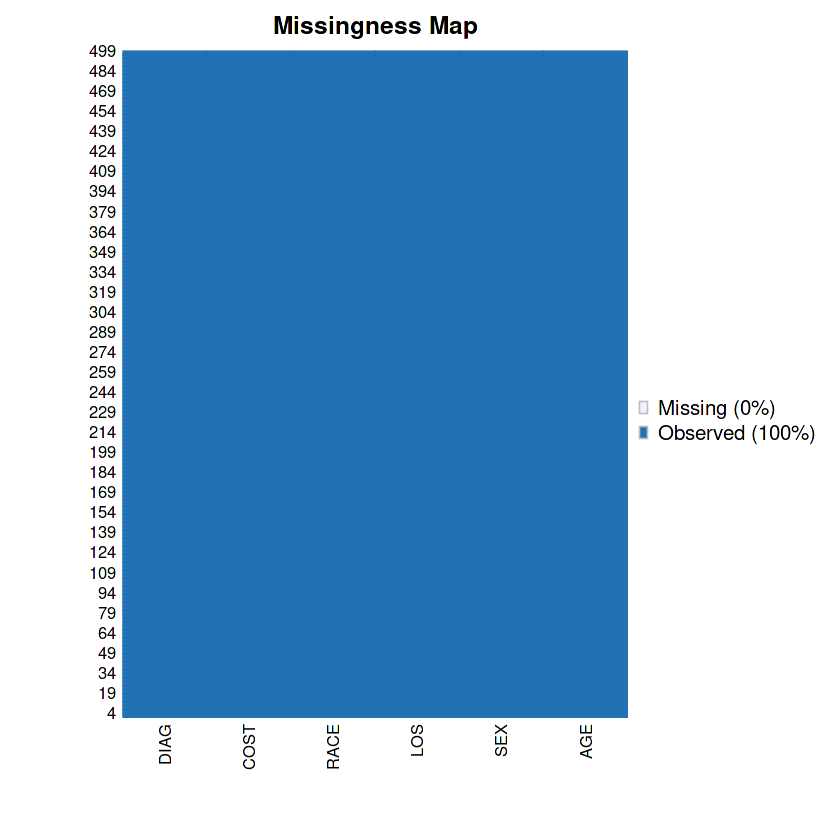

In [8]:
data <- na.omit(data)
missmap(data)

# **Task 1:**

Analysing age category of people who come to the hospital and has the maximum expense.

* Step 1: Split 'Age' variable to a few categories

* Range: Age 0 to max 17 years old. divide by 4 groups
* a) before 5 years old
* b) 5-10
* c) 10-15
* d) 15>


In [9]:
agegrp <- function(AGE){
  AGE <- as.numeric(AGE)
  if (AGE>=0 & AGE <5){
    return('0-4')
  }else if(AGE>=5 & AGE <10){
    return('5-9')
  }else if(AGE>=10 & AGE <= 15){
    return('10-15')
  }else if(AGE>15){
    return('More than 15')
  }
}

data$AGE <- sapply(data$AGE , agegrp)
data$AGE <- as.factor(data$AGE)
table(data$AGE)


         0-4        10-15          5-9 More than 15 
         322           99           11           67 

# Interpretation: 
In terms of this sample size/dataset, age group 0-4 years old has the highest hospitalisations counts.

ERROR: Error in tapply(hosp$COST, hosp$AGE, summary): object 'hosp' not found


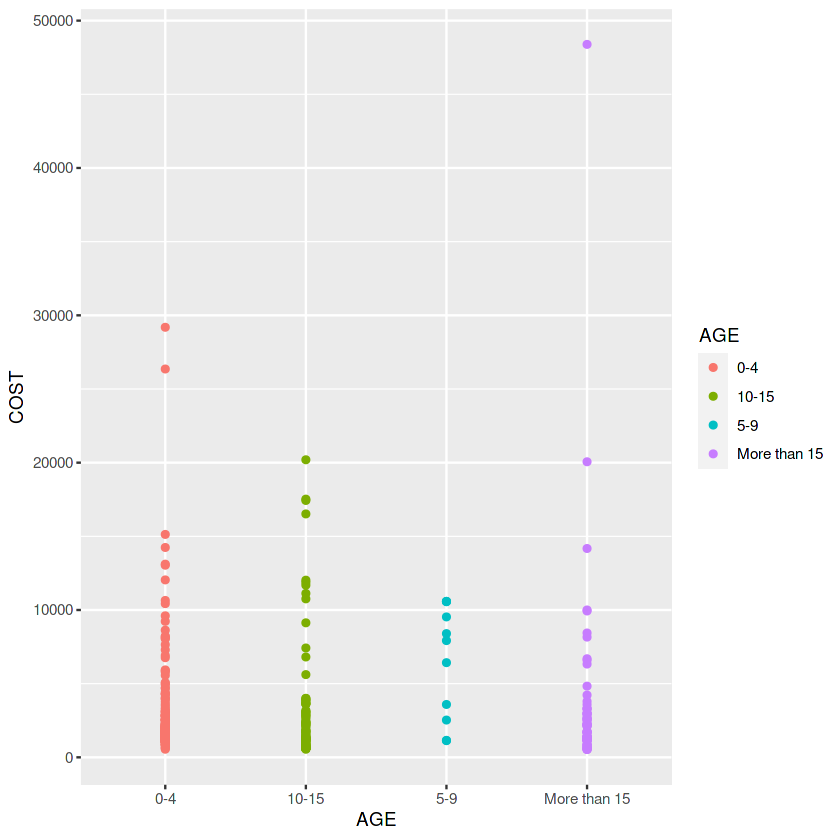

In [10]:
print(ggplot(data, aes(x=AGE, y=COST)) + geom_point(aes(color=AGE)))
tapply(hosp$COST, hosp$AGE, summary)


# Interpretation: 
Age group 5-9 years old age has the highest mean expenditure, whereas age group more than 15 years of age has the maximum value in expenditure.


# Task 2:
Analysing diagnosis and hospitalization cost.

In [11]:
data$DIAG <- as.factor(data$DIAG)

table(data$DIAG)


 21  23  49  50  51  53  54  57  58  92  97 114 115 137 138 139 141 143 204 206 
  1   1   1   1   1  10   1   2   1   1   1   1   2   1   4   5   1   1   1   1 
225 249 254 308 313 317 344 347 420 421 422 560 561 566 580 581 602 614 626 633 
  2   6   1   1   1   1   2   3   2   1   3   2   1   1   1   3   1   3   6   4 
634 636 639 640 710 720 723 740 750 751 753 754 755 756 758 760 776 811 812 863 
  2   3   4 266   1   1   2   1   1  14  36  37  13   2  20   2   1   2   3   1 
911 930 952 
  1   2   1 

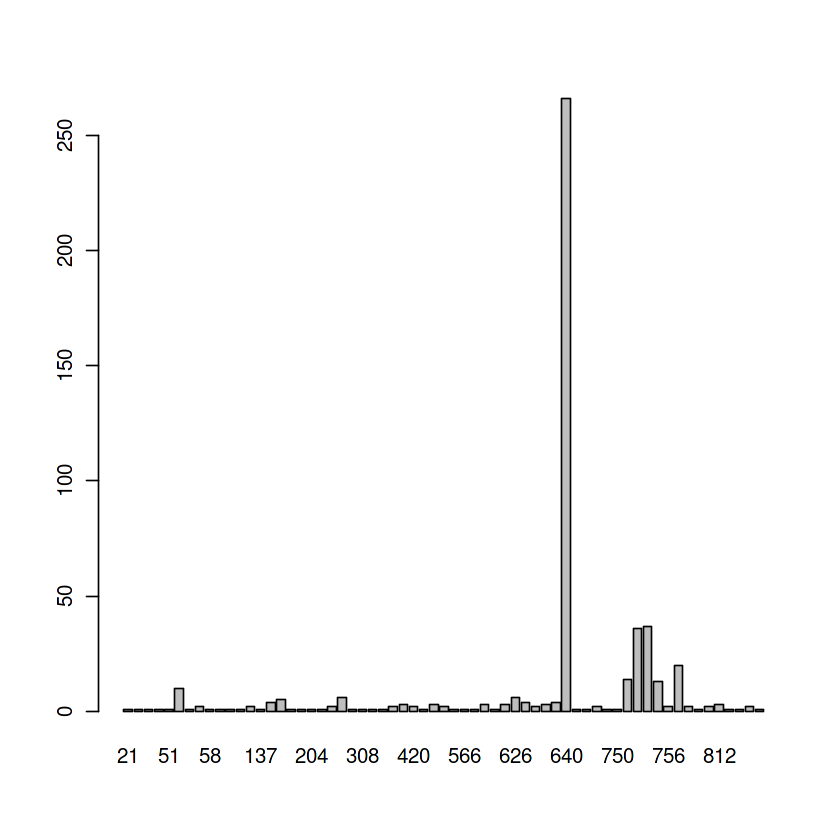

In [12]:
plot(data$DIAG)

# Interpretation: 
Diagnosis group '640' has the highest hospitalization, followed by '754' and '753'

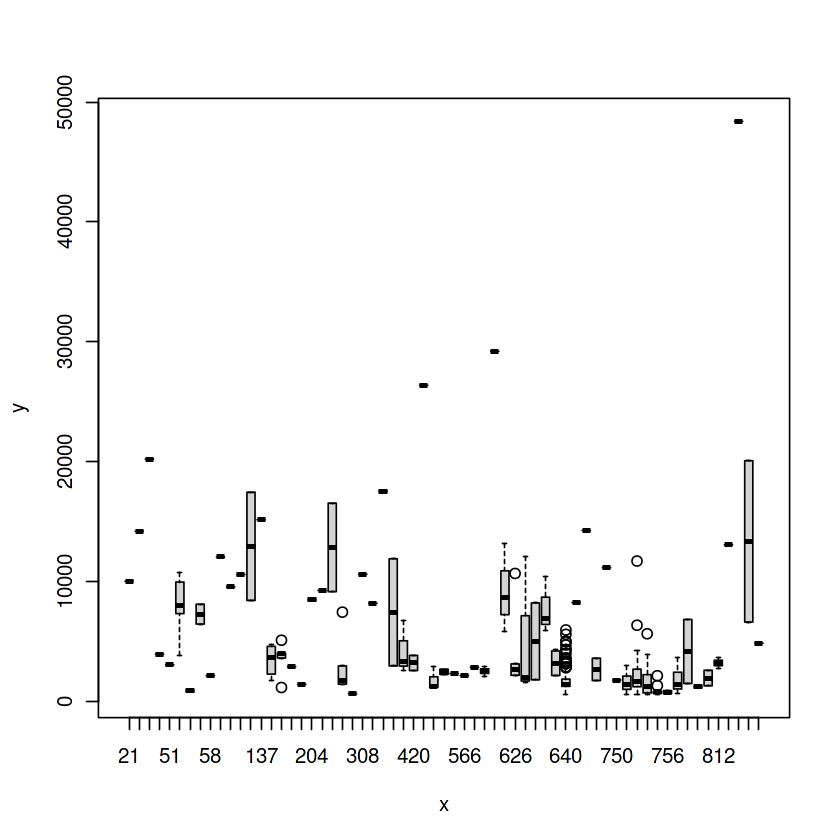

In [15]:
plot(data$DIAG, data$COST)

In [13]:
tapply(data$COST, data$DIAG, summary)

$`21`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10002   10002   10002   10002   10002   10002 

$`23`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14174   14174   14174   14174   14174   14174 

$`49`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20195   20195   20195   20195   20195   20195 

$`50`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3908    3908    3908    3908    3908    3908 

$`51`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3023    3023    3023    3023    3023    3023 

$`53`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3782    7386    7986    8227    9850   10756 

$`54`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    851     851     851     851     851     851 

$`57`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6425    6840    7254    7254    7669    8084 

$`58`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2117    2117    2117    2117    2117    2117 

$`92`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 


# Interpretation: 
Group 911 has the highest expenditure.

# TASK 3:
Analyzing race distribution and hospitalization cost

In [20]:
table(data$RACE)


  1   2   3   4   5   6 
484   6   1   3   3   2 

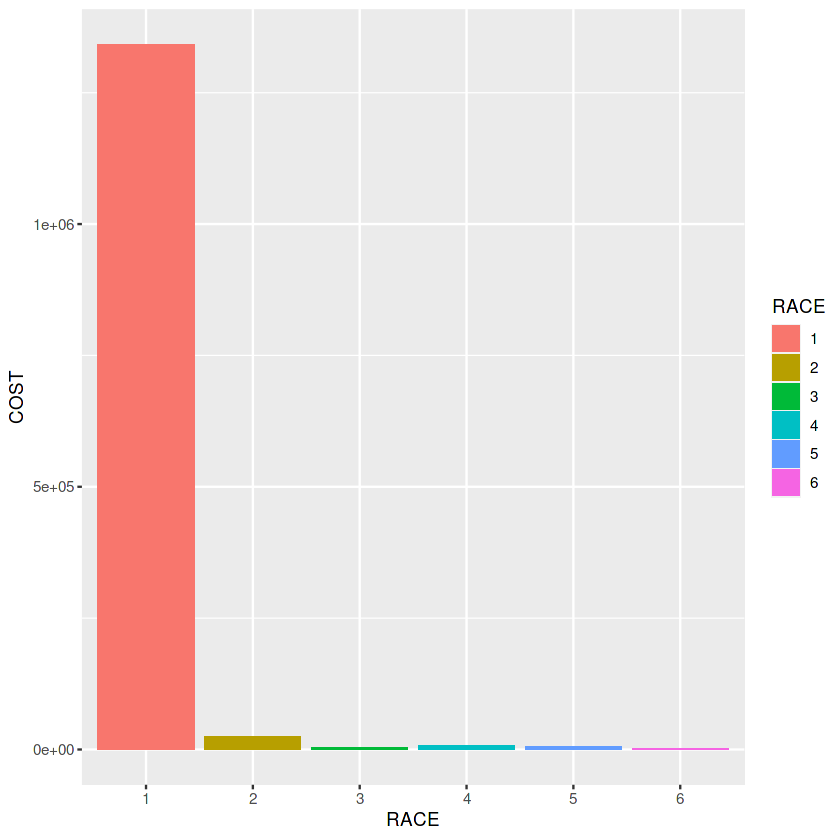

In [17]:
print(ggplot(data, aes(x=RACE, y=COST)) + geom_col(aes(fill=RACE)))


In [19]:
tapply(data$COST, data$RACE,summary)

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    532    1219    1538    2773    2484   48388 

$`2`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1153    1352    2304    4202    6888   10002 

$`3`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3041    3041    3041    3041    3041    3041 

$`4`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1173    1954    2735    2345    2930    3126 

$`5`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    615    1004    1393    2027    2732    4072 

$`6`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1163    1256    1349    1349    1442    1535 


**Interpretation**

No idea what the race factors denote. 
race factor 1 obviously dominates the data and has the highest expenditure in terms of max values while the mean expenditure for group 2 is the highest.


# TASK 4:
Analyzing age and gender distibution and cost


$M
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    550    1286    1669    3014    2841   26356 

$F
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    532    1140    1436    2552    2268   48388 


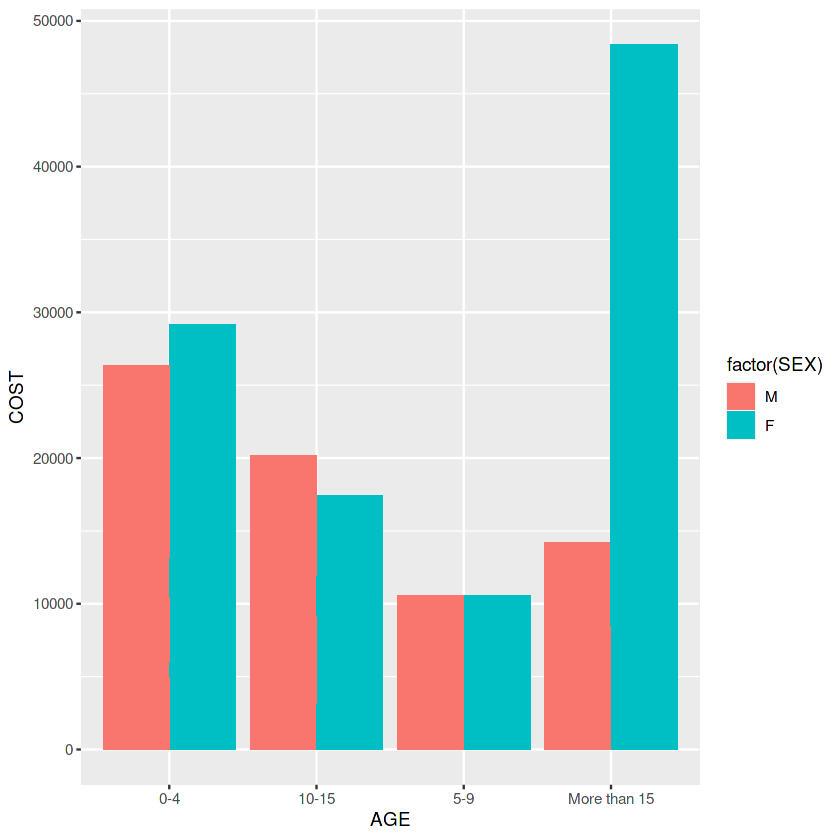

In [22]:
print(ggplot(data, aes(x=AGE, y=COST)) + geom_col(position = "dodge", aes(fill=factor(SEX))))

#among the males and females:
tapply(data$COST, data$SEX, summary)

# TASK5:
finding if the length of stay can be predicted from age, gender, and race.

Step 1: find out if Length of stay (LOS) has any correlation between any of the 3 variables.
Note: they are not normality distributed.

In [23]:
#convert to numeric 
data$AGE <- as.numeric(data$AGE)
data$SEX <- as.numeric(data$SEX)
data$RACE <- as.numeric(data$RACE)

In [24]:
#Age is an ordinal categorical variable. Spearman test will be used instead.
cor.test(data$AGE,data$LOS, method = "spearman",exact = FALSE)
cor.test(data$SEX,data$LOS)
cor.test(data$RACE,data$LOS)



	Spearman's rank correlation rho

data:  data$AGE and data$LOS
S = 24405651, p-value = 6.062e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.178533 



	Pearson's product-moment correlation

data:  data$SEX and data$LOS
t = 0.80935, df = 497, p-value = 0.4187
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05166264  0.12366503
sample estimates:
       cor 
0.03628037 



	Pearson's product-moment correlation

data:  data$RACE and data$LOS
t = -0.39676, df = 497, p-value = 0.6917
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.10540798  0.07009383
sample estimates:
        cor 
-0.01779414 


***Only Age is correlated to LOS***

In [25]:
#convert them back to factors
data$AGE <- as.factor(data$AGE)
levels(data$AGE) <- c('0-4','5-9','10-15','More than 15')

data$SEX <- as.factor(data$SEX)
levels(data$SEX) <- c('MALE', 'FEMALE')

data$RACE <- as.factor(data$RACE)

In [27]:
modage <- lm(LOS~ AGE, data=data)
summary(modage)

modgender <- lm(LOS~ SEX, data=data)
summary(modgender)

modrace <- lm(LOS~ RACE, data=data)
summary(modrace)



Call:
lm(formula = LOS ~ AGE, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-3.022 -1.022 -1.022 -0.022 37.978 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.0217     0.1874  16.128   <2e-16 ***
AGE5-9           -0.3147     0.3864  -0.814    0.416    
AGE10-15         -1.3854     1.0309  -1.344    0.180    
AGEMore than 15  -0.7382     0.4515  -1.635    0.103    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.362 on 495 degrees of freedom
Multiple R-squared:  0.008683,	Adjusted R-squared:  0.002675 
F-statistic: 1.445 on 3 and 495 DF,  p-value: 0.2288



Call:
lm(formula = LOS ~ SEX, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-2.949 -0.949 -0.705  0.295 38.051 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.7049     0.2156  12.546   <2e-16 ***
SEXFEMALE     0.2441     0.3016   0.809    0.419    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.368 on 497 degrees of freedom
Multiple R-squared:  0.001316,	Adjusted R-squared:  -0.0006932 
F-statistic: 0.655 on 1 and 497 DF,  p-value: 0.4187



Call:
lm(formula = LOS ~ RACE, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-2.841 -0.841 -0.841  0.159 38.159 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.8409     0.1537  18.485   <2e-16 ***
RACE2        -0.6742     1.3889  -0.485    0.628    
RACE3         1.1591     3.3847   0.342    0.732    
RACE4         0.4924     1.9582   0.251    0.802    
RACE5        -0.8409     1.9582  -0.429    0.668    
RACE6        -0.8409     2.3958  -0.351    0.726    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.381 on 493 degrees of freedom
Multiple R-squared:  0.001465,	Adjusted R-squared:  -0.008662 
F-statistic: 0.1447 on 5 and 493 DF,  p-value: 0.9816



***All linear regression models are not statistically significant.***

# Task 6:
finding the variable that mainly affects the hospital costs.

In [28]:
data$DIAG <- as.numeric(data$DIAG)
model <- lm(COST ~., data=data)
summary(model)
step(model)


Call:
lm(formula = COST ~ ., data = data)

Residuals:
   Min     1Q Median     3Q    Max 
 -6415   -591   -179     87  43168 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5313.24     509.73  10.424  < 2e-16 ***
AGE5-9           1585.78     312.32   5.077 5.46e-07 ***
AGE10-15         2190.65     854.40   2.564   0.0106 *  
AGEMore than 15  2422.13     363.65   6.661 7.38e-11 ***
SEXFEMALE        -367.90     248.69  -1.479   0.1397    
LOS               736.21      35.08  20.987  < 2e-16 ***
RACE2             323.55    1087.93   0.297   0.7663    
RACE3            -181.14    2625.83  -0.069   0.9450    
RACE4            -369.56    1523.14  -0.243   0.8084    
RACE5           -1407.58    1528.82  -0.921   0.3577    
RACE6            -838.20    1859.93  -0.451   0.6524    
DIAG             -119.69      11.51 -10.403  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2617 on 487 degrees of f

Start:  AIC=7866.05
COST ~ AGE + SEX + LOS + RACE + DIAG

       Df  Sum of Sq        RSS    AIC
- RACE  5    8275642 3344620692 7857.3
<none>               3336345050 7866.1
- SEX   1   14992676 3351337726 7866.3
- AGE   3  425728929 3762073979 7920.0
- DIAG  1  741347948 4077692998 7964.2
- LOS   1 3017499056 6353844107 8185.5

Step:  AIC=7857.29
COST ~ AGE + SEX + LOS + DIAG

       Df  Sum of Sq        RSS    AIC
<none>               3344620692 7857.3
- SEX   1   14412755 3359033448 7857.4
- AGE   3  440902746 3785523439 7913.1
- DIAG  1  739822336 4084443029 7955.0
- LOS   1 3026737557 6371358249 8176.9



Call:
lm(formula = COST ~ AGE + SEX + LOS + DIAG, data = data)

Coefficients:
    (Intercept)           AGE5-9         AGE10-15  AGEMore than 15  
         5260.0           1595.6           2258.1           2430.5  
      SEXFEMALE              LOS             DIAG  
         -359.3            737.0           -119.0  


# Interpretation:
Using stepwise model building, only Age,Gender, Length of stay (LOS), and diagnosis group (APRDRG) are statistically significant.